## Sales Analysis

In [133]:
# Import libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from itertools import combinations
from collections import Counter

In [3]:
# Merging 12 months of Sales data into a single file

files = [file for file in os.listdir(r"C:\Data Scientist Career\Case Studies\Datasets\Tasks Master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Data Scientist Career\Case Studies\Datasets\Tasks Master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

In [5]:
# Read in updated DataFrame

all_data = pd.read_csv(r"C:\Data Scientist Career\Case Studies\Datasets\Tasks Master\Pandas-Data-Science-Tasks-master\SalesAnalysis\all_data.csv")

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


#### Data Cleaning

In [9]:
# Identifying Null values

all_data.isnull().sum()

Order ID            536
Product             536
Quantity Ordered    536
Price Each          536
Order Date          536
Purchase Address    536
dtype: int64

In [11]:
# Removing Null values

all_data = all_data.dropna()

In [13]:
# Checking for Null values

all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
# Dropping rows that contains literal string "Order ID" in the Order ID column

all_data = all_data[all_data["Order ID"] != "Order ID"]

In [17]:
all_data[all_data["Order ID"] == "Order ID"].count()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
# Reseting Index

all_data = all_data.reset_index(drop = True)

In [21]:
# Data Exploration

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [23]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], format = "mixed", dayfirst = False)

In [24]:
# Data Exploration

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.5+ MB


In [25]:
# Augment data with additonal columns

# Adding Month column

all_data["month"] = all_data["Order Date"].dt.month

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [26]:
# Identifying unique values in a month column

all_data["month"].nunique()

12

In [27]:
# Convert Month column from object into integer data type

all_data["month"] = all_data["month"].astype(int)

In [28]:
# Convert Quantity Ordered column from object into integer data type

all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)

In [29]:
# Convert Order ID column from object into integer data type

all_data["Order ID"] = all_data["Order ID"].astype(int)

In [30]:
# Convert Price Each column from object into float data type
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [31]:
# Data Exploration

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   month             185950 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 7.8+ MB


In [32]:
# Data Exploration

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [33]:
# Adding a Revenue column

all_data["Revenue"] = all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [34]:
all_data[["street","city","zip"]] = all_data["Purchase Address"].str.split(",", expand = True)

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [35]:
# Removing Leading/Trailing Whitespaces in a column

all_data["zip"] = all_data["zip"].str.strip()

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [36]:
# Removing Leading/Trailing Whitespaces in a column

all_data["street"] = all_data["street"].str.strip()

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [37]:
# Removing Leading/Trailing Whitespaces in a column

all_data["city"] = all_data["city"].str.strip()

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001


In [38]:
# Splitting column

all_data[["state","zip_code"]] = all_data["zip"].str.split(" ", expand = True)

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,zip,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,CA,90001


In [39]:
# Dropping column

all_data = all_data.drop(columns = ["zip"])

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001


In [40]:
# Removing Leading/Trailing Whitespaces in a column

all_data["state"] = all_data["state"].str.strip()

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001


In [41]:
# Removing Leading/Trailing Whitespaces in a column

all_data["zip_code"] = all_data["zip_code"].str.strip()

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,street,city,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA,90001


In [42]:
# Dropping column

all_data = all_data.drop(columns = ["Purchase Address"])

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,month,Revenue,street,city,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,333 8th St,Los Angeles,CA,90001


In [43]:
# Renaming columns

all_data = all_data.rename(columns = {
    "Order ID":"order_id",
    "Product":"product",
    "Quantity Ordered":"quantity_ordered",
    "Price Each":"price",
    "Order Date":"order_date",
    "Revenue":"revenue"
})

all_data.head(5)

,order_id,product,quantity_ordered,price,order_date,month,revenue,street,city,state,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,682 Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,333 8th St,Los Angeles,CA,90001


In [44]:
# Creating new column by extracting Hour from order data column

all_data["hour"] = all_data["order_date"].dt.hour
all_data.head(5)

,order_id,product,quantity_ordered,price,order_date,month,revenue,street,city,state,zip_code,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,917 1st St,Dallas,TX,75001,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,682 Chestnut St,Boston,MA,02215,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,669 Spruce St,Los Angeles,CA,90001,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,669 Spruce St,Los Angeles,CA,90001,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,333 8th St,Los Angeles,CA,90001,9


In [45]:
all_data["minute"] = all_data["order_date"].dt.minute
all_data.head(5)

,order_id,product,quantity_ordered,price,order_date,month,revenue,street,city,state,zip_code,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,4,23.90,917 1st St,Dallas,TX,75001,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,4,99.99,682 Chestnut St,Boston,MA,02215,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,4,600.00,669 Spruce St,Los Angeles,CA,90001,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,4,11.99,669 Spruce St,Los Angeles,CA,90001,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,4,11.99,333 8th St,Los Angeles,CA,90001,9,27


In [46]:
# Reordering columns in a DataFrame

sales_data = all_data[["order_id","order_date","month","product","quantity_ordered","price","revenue","street","city","state","zip_code"]]

sales_data.head(5)

,order_id,order_date,month,product,quantity_ordered,price,revenue,street,city,state,zip_code
0,176558,2019-04-19 08:46:00,4,USB-C Charging Cable,2,11.95,23.90,917 1st St,Dallas,TX,75001
1,176559,2019-04-07 22:30:00,4,Bose SoundSport Headphones,1,99.99,99.99,682 Chestnut St,Boston,MA,02215
2,176560,2019-04-12 14:38:00,4,Google Phone,1,600.00,600.00,669 Spruce St,Los Angeles,CA,90001
3,176560,2019-04-12 14:38:00,4,Wired Headphones,1,11.99,11.99,669 Spruce St,Los Angeles,CA,90001
4,176561,2019-04-30 09:27:00,4,Wired Headphones,1,11.99,11.99,333 8th St,Los Angeles,CA,90001


#### Exploratory Data Analysis

##### Questions to answer:
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What state sold the most product?
4. What time should we display advertisements to maximize likelihood of customer's buying product?
5. What products are most often sold together?
6. What product sold the most? Why do you think it did?

In [49]:
# 1. What was the best month for sales? How much was earned that month?

monthly_revenue = all_data.groupby("month")["revenue"].sum().reset_index()
monthly_revenue

,month,revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


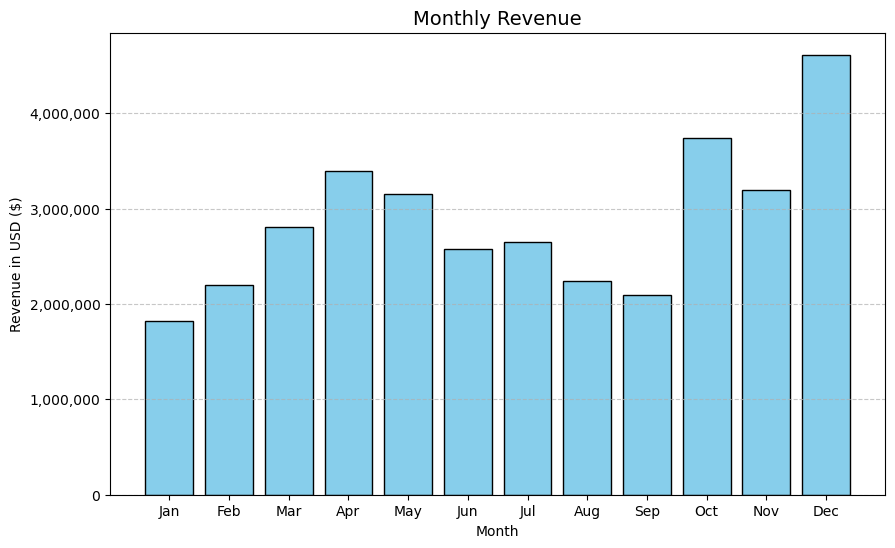

In [50]:
# Creating a Bar Plot

plt.figure(figsize = (10, 6))

plt.bar(
    x = monthly_revenue["month"],
    height = monthly_revenue["revenue"],
    color = "skyblue",
    edgecolor = "black"
)

month_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.title("Monthly Revenue", fontsize = 14)
plt.xlabel("Month", fontsize = 10)
plt.ylabel("Revenue in USD ($)", fontsize = 10)
plt.xticks(monthly_revenue["month"], labels = month_names)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [51]:
# 2. What city sold the most product?

city_revenue = all_data.groupby("city")["revenue"].sum().reset_index()
city_revenue = city_revenue.sort_values(by = "revenue", ascending = False)
city_revenue

,city,revenue
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


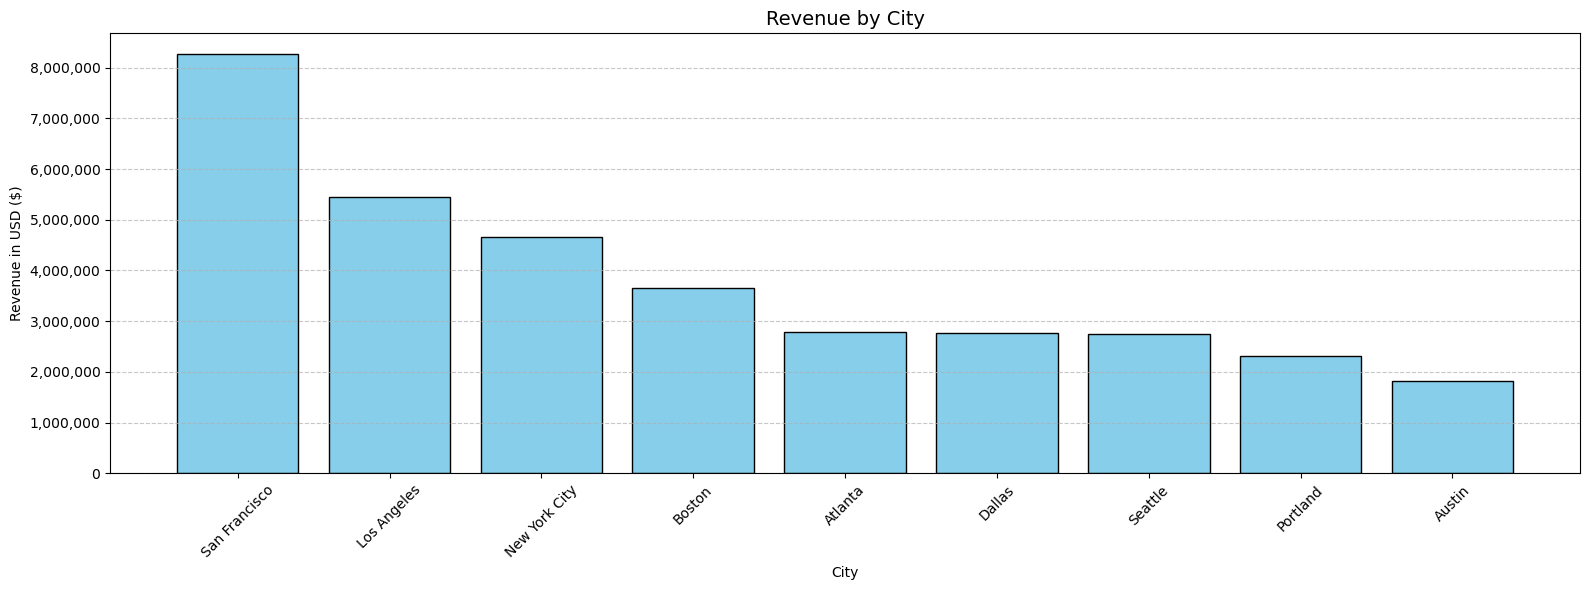

In [52]:
# Creating a Bar Plot

plt.figure(figsize = (16, 6))

plt.bar(
    x = city_revenue["city"],
    height = city_revenue["revenue"],
    color = "skyblue",
    edgecolor = "black"
)

plt.title("Revenue by City", fontsize = 14)
plt.xlabel("City", fontsize = 10)
plt.ylabel("Revenue in USD ($)", fontsize = 10)
plt.xticks(city_revenue["city"], rotation = 45)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [53]:
# 3. What state sold the most product?

state_revenue = all_data.groupby("state")["revenue"].sum().reset_index()
state_revenue = state_revenue.sort_values(by = "revenue", ascending = False)
state_revenue

,state,revenue
0,CA,13714774.71
4,NY,4664317.43
6,TX,4587557.15
2,MA,3661642.01
1,GA,2795498.58
7,WA,2747755.48
5,OR,1870732.34
3,ME,449758.27


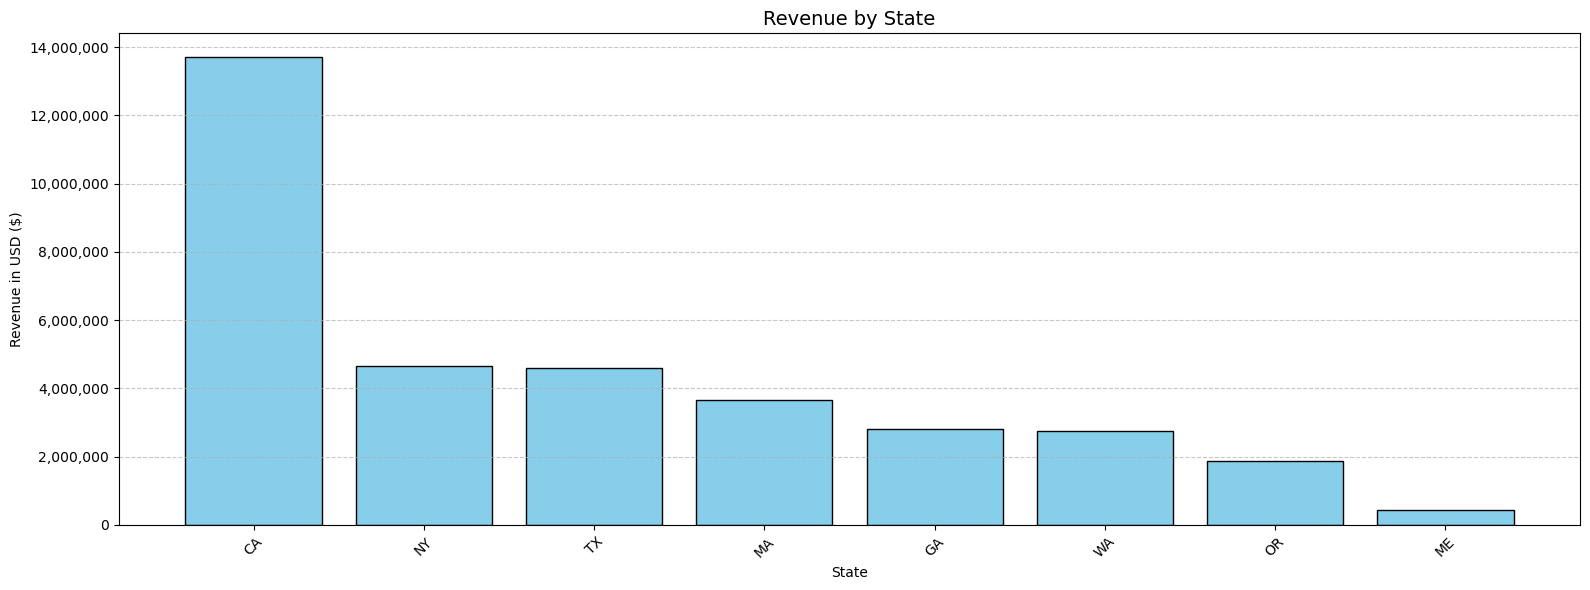

In [54]:
# Creating a Bar Plot

plt.figure(figsize = (16, 6))

plt.bar(
    x = state_revenue["state"],
    height = state_revenue["revenue"],
    color = "skyblue",
    edgecolor = "black"
)

plt.title("Revenue by State", fontsize = 14)
plt.xlabel("State", fontsize = 10)
plt.ylabel("Revenue in USD ($)", fontsize = 10)
plt.xticks(state_revenue["state"], rotation = 45)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [55]:
# 4. What time should we display advertisements to maximize likelihood of customer's buying product?

hour_revenue = all_data.groupby("hour")["quantity_ordered"].count().reset_index()
hour_revenue = hour_revenue.rename(columns = {"quantity_ordered":"total_orders"})
hour_revenue

,hour,total_orders
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


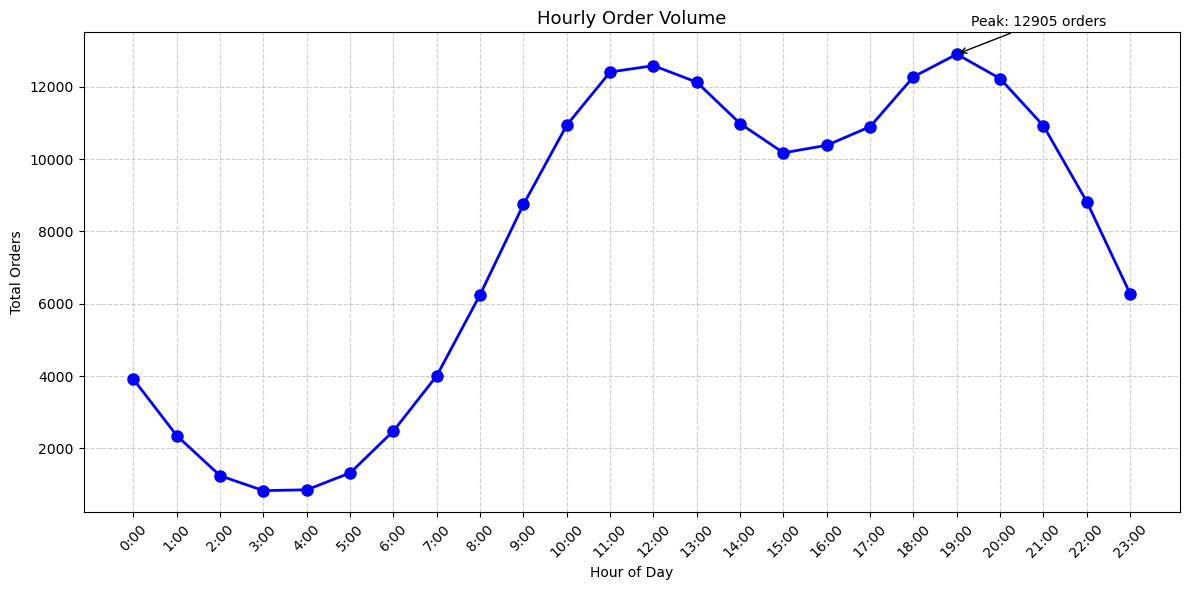

In [56]:
# Creating a Line Plot

plt.figure(figsize = (12, 6))

plt.plot(
    hour_revenue["hour"],
    hour_revenue["total_orders"],
    marker = "o",
    linestyle = "-",
    color = "blue",
    linewidth = 2,
    markersize = 8
)

plt.title("Hourly Order Volume", fontsize = 13)
plt.xlabel("Hour of Day", fontsize = 10)
plt.ylabel("Total Orders", fontsize = 10)
plt.xticks(range(0,24))
plt.grid(True, linestyle = "--", alpha = 0.6)

plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(24)], rotation=45)

max_hour = hour_revenue.loc[hour_revenue["total_orders"].idxmax()]
plt.annotate(f"Peak: {max_hour['total_orders']} orders", 
             xy=(max_hour["hour"], max_hour["total_orders"]),
             xytext=(10, 20), 
             textcoords="offset points",
             arrowprops=dict(arrowstyle="->"))

plt.tight_layout()
plt.show()

# My recommendation si around 11:00h or 19:00h

In [151]:
# 5. What products are most often sold together? (2 most common products together)

df_products = all_data[all_data["order_id"].duplicated(keep = False)]
df_products["grouped"] = df_products.groupby("order_id")["product"].transform(lambda x: ",".join(x))
df_products = df_products[["order_id","grouped"]].drop_duplicates()

count = Counter()

for row in df_products["grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\user\AppData\Local\Temp\ipykernel_12300\143459188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["grouped"] = df_products.groupby("order_id")["product"].transform(lambda x: ",".join(x))


In [153]:
# 5. What products are most often sold together? (3 most common products together)

df_products = all_data[all_data["order_id"].duplicated(keep = False)]
df_products["grouped"] = df_products.groupby("order_id")["product"].transform(lambda x: ",".join(x))
df_products = df_products[["order_id","grouped"]].drop_duplicates()

count = Counter()

for row in df_products["grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


C:\Users\user\AppData\Local\Temp\ipykernel_12300\3794576596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["grouped"] = df_products.groupby("order_id")["product"].transform(lambda x: ",".join(x))


In [177]:
# 6. What product sold the most? Why do you think it did?

top_product = all_data.groupby("product")["quantity_ordered"].sum().reset_index()
top_product = top_product.rename(columns = {"quantity_ordered":"total_orders"})
top_product = top_product.sort_values(by = "total_orders", ascending = False)
top_product

,product,total_orders
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


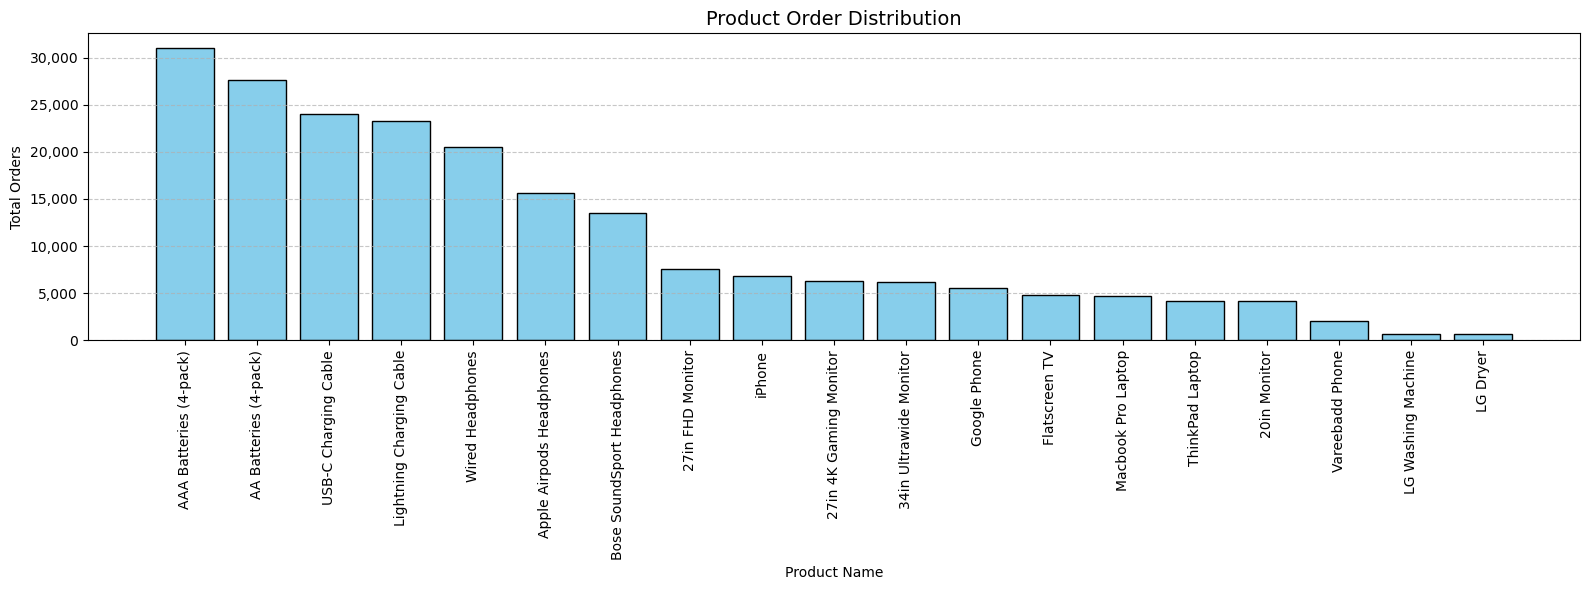

In [231]:
# Creating a Bar Plot

plt.figure(figsize = (16, 6))

plt.bar(
    x = top_product["product"],
    height = top_product["total_orders"],
    color = "skyblue",
    edgecolor = "black"
)

plt.title("Product Order Distribution", fontsize = 14)
plt.xlabel("Product Name", fontsize = 10)
plt.ylabel("Total Orders", fontsize = 10)
plt.xticks(top_product["product"], rotation = 90)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [213]:
prices = all_data.groupby("product")["price"].mean().reset_index()
prices = prices.sort_values(by = "price", ascending = False)
prices

,product,price
13,Macbook Pro Laptop,1700.00
14,ThinkPad Laptop,999.99
18,iPhone,700.00
10,LG Dryer,600.00
11,LG Washing Machine,600.00
9,Google Phone,600.00
16,Vareebadd Phone,400.00
1,27in 4K Gaming Monitor,389.99
3,34in Ultrawide Monitor,379.99
8,Flatscreen TV,300.00


In [277]:
# Merge the top products with their average prices
merged_data = top_product.merge(prices, on="product", how="left")
merged_data

,product,total_orders,price
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


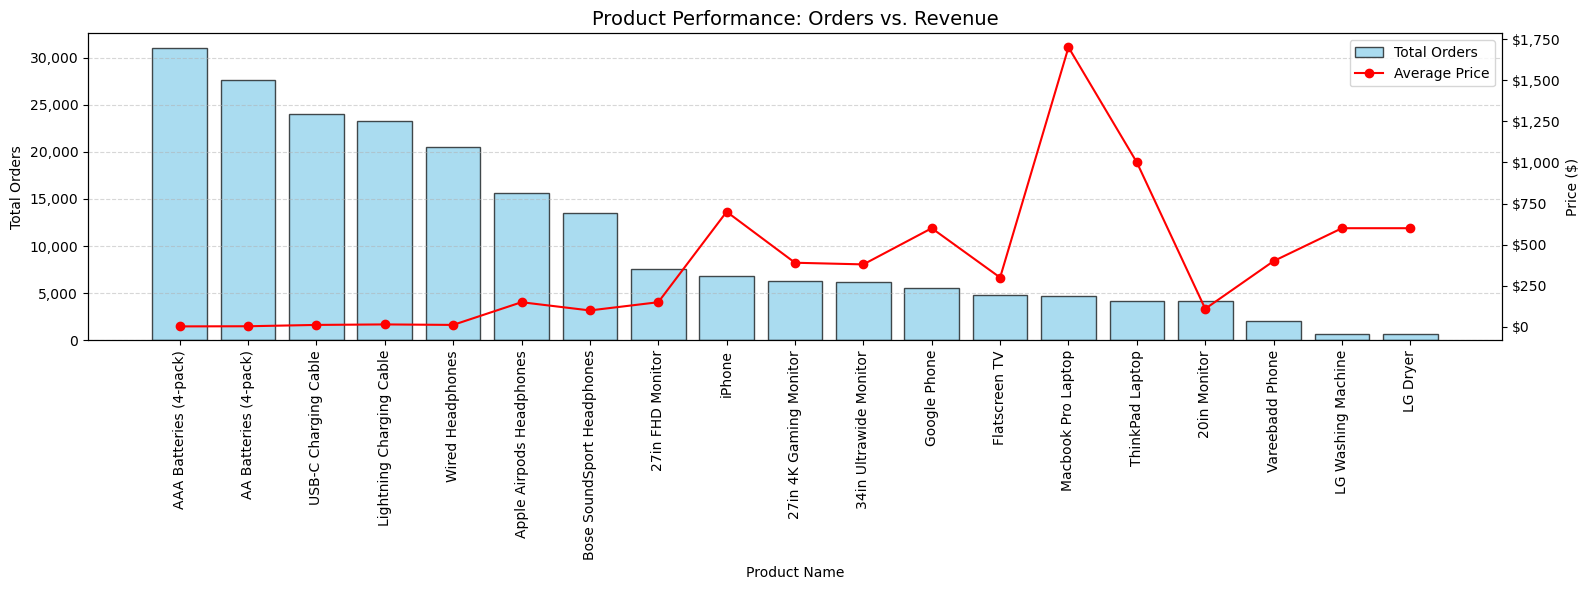

In [317]:
# Creating a Combo Plot (Bar Plot and Line Plot)

fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(
    x = merged_data["product"],
    height = merged_data["total_orders"],
    color = "skyblue",
    edgecolor = "black",
    alpha = 0.7,
    label = "Total Orders"
)

ax1.set_title("Product Performance: Orders vs. Revenue", fontsize = 14)
ax1.set_xlabel("Product Name", fontsize = 10)
ax1.set_ylabel("Total Orders", fontsize = 10)
ax1.tick_params(axis = "x", rotation = 90)
ax1.grid(axis = "y", linestyle = "--", alpha = 0.5)
ax1.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

ax2 = ax1.twinx()
ax2.plot(
    merged_data["product"],
    merged_data["price"],
    color = "red",
    marker = "o",
    linewidth = 1.5,
    label = "Average Price"
)

ax2.set_ylabel("Price ($)", fontsize = 10)
ax2.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()